<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#ОБЩИЙ-ВЫВОД" data-toc-modified-id="ОБЩИЙ-ВЫВОД-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>ОБЩИЙ ВЫВОД</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Необхожимо защитить данные клиентов страховой компании «Хоть потоп». Разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обосновать корректность его работы.
Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось.

**План разработки метода защиты данных клиентов страховой компании «Хоть потоп»:**

1) Загрузить и изучить данные.

2) Ответить на вопрос "Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?" и обосновать решение.

3) Предложить алгоритм преобразования данных для решения задачи. Обосновать, почему качество линейной регрессии не поменяется.

4) Запрограммировать этот алгоритм, применив матричные операции. Проверить, что качество линейной регрессии из sklearn не отличается до и после преобразования. Применить метрику R2.


**Описание данных**

- Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
- Целевой признак: количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

**Подгрузим библиотеки и данные, изучим их**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
try:
    df= pd.read_csv('/datasets/insurance.csv', sep=',')
except:
    df_train = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv', sep=',')

In [3]:
def df_info(df):
    display(df.shape)
    print(100*"/")
    df.info()
    print(100*"/")
    display(df.describe())
    print(100*"/")
    display('Доля пропусков по каждому столбцу:', (round(df.isna().sum()/df.shape[0]*100, 2)).sort_values(ascending=False))
    print(100*"/")
    print('Доля строк с хотябы одним пропущенным значением:', \
          round(sum(df.apply(lambda x: sum(x.isnull().values), axis = 1)>0)/len(df)*100, 2), '%')
    print(100*"/")
    display('Количество дубликатов:', df.duplicated().sum())
    print(100*"/")

In [4]:
df_info(df)

(5000, 5)

////////////////////////////////////////////////////////////////////////////////////////////////////
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
////////////////////////////////////////////////////////////////////////////////////////////////////


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


////////////////////////////////////////////////////////////////////////////////////////////////////


'Доля пропусков по каждому столбцу:'

Пол                  0.0
Возраст              0.0
Зарплата             0.0
Члены семьи          0.0
Страховые выплаты    0.0
dtype: float64

////////////////////////////////////////////////////////////////////////////////////////////////////
Доля строк с хотябы одним пропущенным значением: 0.0 %
////////////////////////////////////////////////////////////////////////////////////////////////////


'Количество дубликатов:'

153

////////////////////////////////////////////////////////////////////////////////////////////////////


array([[<AxesSubplot:title={'center':'Пол'}>,
        <AxesSubplot:title={'center':'Возраст'}>],
       [<AxesSubplot:title={'center':'Зарплата'}>,
        <AxesSubplot:title={'center':'Члены семьи'}>],
       [<AxesSubplot:title={'center':'Страховые выплаты'}>,
        <AxesSubplot:>]], dtype=object)

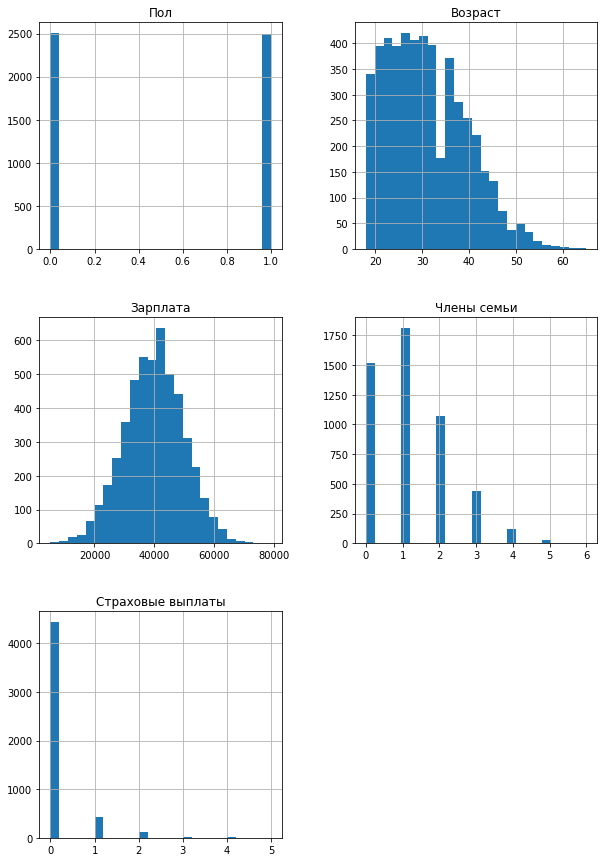

In [5]:
df.hist(figsize=(10, 15), bins=25)

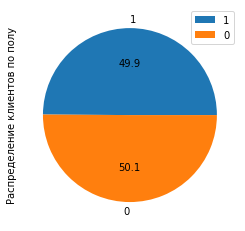

0    2505
1    2495
Name: Пол, dtype: int64

In [6]:
df['Пол'].value_counts(ascending=True).plot.pie(label='Распределение клиентов по полу', autopct="%.1f")
plt.legend()
plt.show()
df['Пол'].value_counts()

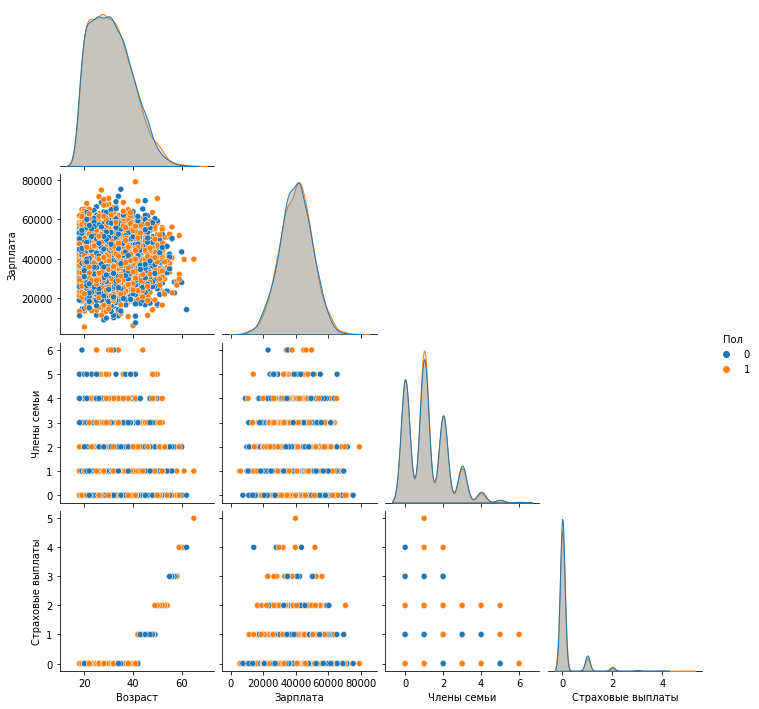

In [7]:
sns.pairplot(df, hue='Пол', corner=True);

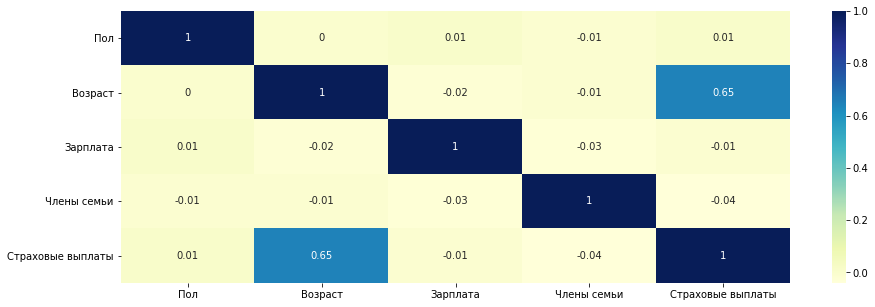

In [8]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr().round(2), cmap="YlGnBu", annot=True)
plt.show()

**Общая информация о данных**
- в датафрейме 5000 объектов, 4 признака ('Пол', 'Возраст', 'Зарплата', 'Члены семьи') и один целевой ('Страховые выплаты').
- признак 'Пол' - классификационный.
- значения признака 'Зарплата' - имеют нормальное распределение.
- признаки 'Возраст' и 'Зарплата' имеют тип числа с плавающей точкой float64, остальные - целые int64.
- количество данные о мужчинах практически равно количеству данных о женщинах.
- отмечается сильная зависимость между страховыми выплатами и возрастом.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**При умножении признаков на обратимую матрицу качество линейной регрессии не изменится.**

**Обоснование:**

**Перед тем как приступить к доказательству, необходимо определить свойства обратимых и транспонированных матриц:**

Свойства обратимых матриц:
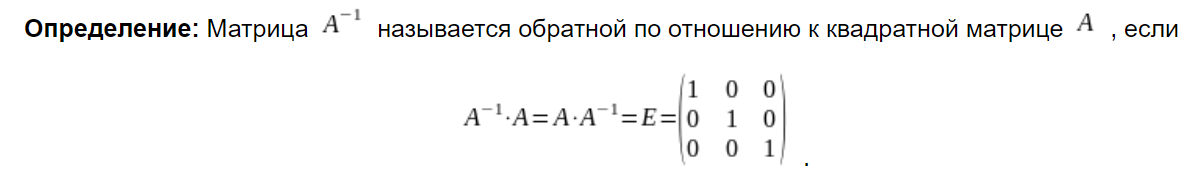,
где E - единичная матрица.
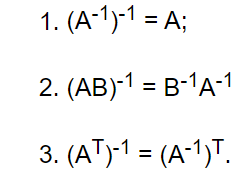

Свойства транспонированных матриц:
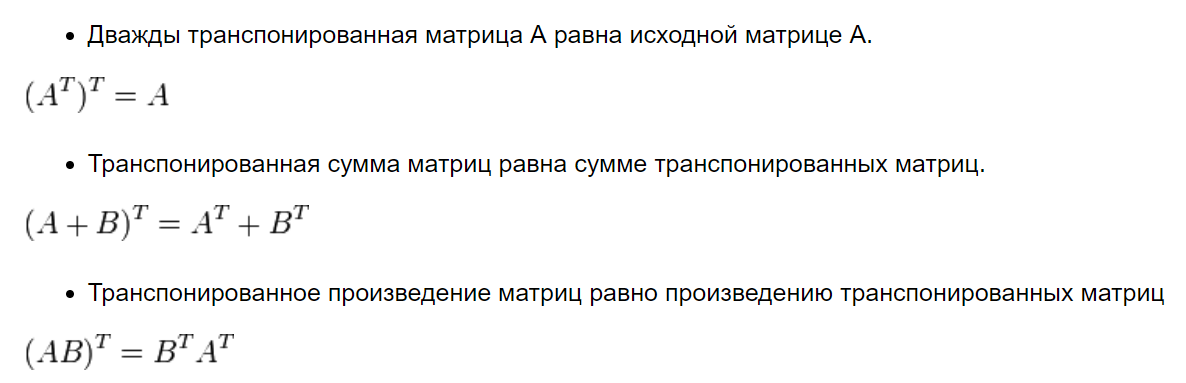

Для нашей задачи воспользуемся свойством единичной матрицы, вторым свойством обратимых матриц и третьим свойством транспонированных матриц.

Запишем формулу предсказаний с учетом перемножения матрицы признаков $X$ на обратимую матрицу $P$:
$$a' = XPw'$$
Формулу обучения также запишем с учетом перемножения матрицы признаков $X$ на обратимую матрицу $P$:
$$w' = ((XP)^TXP)^{-1}(XP)^Ty$$
Подставим полученную формулу $w'$ в формулу предсказаний $a'$ и раскроем скобки с учетом свойств матриц:

$$a' = XP((XP)^TXP)^{-1}(XP)^Ty = XP(P^TX^TXP)^{-1}P^TX^Ty = XPP^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^Ty$$

Обратим внимание, что
$$PP^{-1} = E$$ и $$(P^T)^{-1}P^T = E$$
Исходя из этого напишем окончательный ответ:
$$a' = X(X^TX)^{-1}X^Ty = a$$
Формула предсказаний таже, соответственно качество линейной регрессии останется тем же.

## Алгоритм преобразования

**Алгоритм**

1) Создадим случайную обратимую матрицу;

2) Проверим что она обратима;

3) Обучим линейную регрессию на исходных данных и рассчитаем метрику R2;

4) Обучим линейную регрессию на данных перемноженных на обратимую матрицу и рассчитаем метрику R2;

5) Сравним полученные метрики.

**Обоснование**

Обоснование аналогично обоснованию, представленному в пункте 2.

## Проверка алгоритма

**Разобьем данные на признаки и целевой признак**

In [9]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']
display(features)
display(target)

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0
...,...,...,...,...
4995,0,28.0,35700.0,2
4996,0,34.0,52400.0,1
4997,0,20.0,33900.0,2
4998,1,22.0,32700.0,3


0       0
1       1
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Страховые выплаты, Length: 5000, dtype: int64

**Создадим обратимую матрицу. Если сгенерировать случайную матрицу функцией numpy.random.normal(), вероятность получить необратимую матрицу близка к нулю.**

In [10]:
np.random.seed(42)
P = np.random.normal(size=(4, 4))
print(P)

[[ 0.49671415 -0.1382643   0.64768854  1.52302986]
 [-0.23415337 -0.23413696  1.57921282  0.76743473]
 [-0.46947439  0.54256004 -0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024 -1.72491783 -0.56228753]]


**Проверим ее обратимость. Чтобы найти обратную матрицу, вызовем функцию numpy.linalg.inv(). Также она поможет проверить матрицу на обратимость: если матрица необратима, будет обнаружена ошибка.

In [11]:
np.linalg.inv(P)

array([[-0.33124857, -1.0333483 , -2.21070923, -0.47651024],
       [ 0.12864778, -0.47781825,  0.15271687, -0.43017975],
       [-0.51338817,  0.33588835, -0.8347692 , -0.24072429],
       [ 0.99462192,  0.15079316,  1.08985145,  0.21872535]])

**Все отлично, ошибки нет, матрица обратима**

**Обучим модель на исходных данных**

In [12]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
r2 = round(r2_score(target, predictions), 5)
print('R2:', r2)

R2: 0.42495


**Умножим таблицу с признаками на обратимую матрицу P и сохраним в переменной features_p.**

In [13]:
features_p = features @ P
display('Данные до преобразования:', features)
print(100*"/")
display('Данные после преобразования', features_p)

'Данные до преобразования:'

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0
...,...,...,...,...
4995,0,28.0,35700.0,2
4996,0,34.0,52400.0,1
4997,0,20.0,33900.0,2
4998,1,22.0,32700.0,3


////////////////////////////////////////////////////////////////////////////////////////////////////


'Данные после преобразования'

,0,1,2,3
0,-23294.791154,26899.327002,-22921.847067,-23067.770211
1,-17850.555758,20604.598076,-17538.953455,-17662.990926
2,-9865.752553,11386.970944,-9685.974377,-9758.069218
3,-19581.515190,22616.010381,-19294.804157,-19405.939170
4,-12259.341053,14154.123038,-12050.336135,-12132.535366
...,...,...,...,...
4995,-16766.307948,19359.011161,-16503.243510,-16606.188605
4996,-24608.177075,28420.272347,-24231.118785,-24378.708594
4997,-15919.380826,18384.276178,-15681.725366,-15774.014527
4998,-15355.741193,17730.684307,-15123.542938,-15212.643210


**Видно, что данные значительно изменились и при этом обезличились.**

In [14]:
model_p = LinearRegression()
model_p.fit(features_p, target)
predictions_p = model_p.predict(features_p)
r2_p = round(r2_score(target, predictions_p), 5)
print('R2:', r2_p)

R2: 0.42495


In [15]:
print('R2 линейной регрессии на исходных данных:', r2)
print('R2 линейной регрессии на данных перемноженных на обратимую матрицу:', r2_p)

R2 линейной регрессии на исходных данных: 0.42495
R2 линейной регрессии на данных перемноженных на обратимую матрицу: 0.42495


**В результате умножения признаков на обратимую матрицу качество линейной регрессии не меняется**

## ОБЩИЙ ВЫВОД


**Общая информация о данных**
- в датафрейме 5000 объектов, 4 признака ('Пол', 'Возраст', 'Зарплата', 'Члены семьи') и один целевой ('Страховые выплаты').
- признак 'Пол' - классификационный.
- значения признака 'Зарплата' - имеют нормальное распределение.
- признаки 'Возраст' и 'Зарплата' имеют тип числа с плавающей точкой float64, остальные - целые int64.
- количество данные о мужчинах практически равно количеству данных о женщинах.
- отмечается сильная зависимость между страховыми выплатами и возрастом.

**Если умножить признаки на обратимую матрицу, то качество линейной регрессии не изменится. Обоснование приведено во втором пункте.**

**Для шифрования и обезличивания данных клиентов предложен следующий алгоритм:**

1) Создадим случайную обратимую матрицу;

2) Проверим что она обратима;

3) Обучим линейную регрессию на исходных данных и рассчитаем метрику R2;

4) Обучим линейную регрессию на данных перемноженных на обратимую матрицу и рассчитаем метрику R2;

5) Сравним полученные метрики.

**В результате умножения признаков на обратимую матрицу качество линейной регрессии не меняется. Данные клиентов страховой компании «Хоть потоп» зашифрованы успешно.**